In [ ]:
#code for supplement 2: RMSF of centroids for the different MDs

In [20]:
import mdtraj as md
import os

methods = ['TICA', 'TICA_CBA', 'PCA', 'PCA_CBA', 'GROMOS', 'GROMOS_CBA']
path = '/home/jegan/final_centroids/'
home = '/home/jegan/centroid_analysis/RMSF/'
    
#making a fake combined apo trajectory where each frame is one centroid 
traj_apo = md.load(path+'XTAL/XTAL_0.pdb')
for method in methods:
    for x in range(0,10):
        for k in os.listdir(path+method+'/'):
            if k == (method+'_'+str(x)+'.pdb'):
                traj = md.load(path+method+'/'+k)
                traj_apo = traj.join(traj_apo)

joined_traj_apo = traj_apo.superpose(traj_apo,0)
joined_traj_apo.save_pdb(home+'apo_traj.pdb')
print(joined_traj_apo.n_frames)

61


In [33]:

#making a fake combined holo trajectory where each frame is one centroid of the method

traj_holo = md.load(path+'holo_centroids/XTAL/XTAL_0.pdb')
for method in methods:
    for x in range(0,10):
        for k in os.listdir(path+'holo_centroids/'+method+'/'):
            if k == (method+'_'+str(x)+'.pdb'):
                
                traj = md.load(path+'holo_centroids/'+method+'/'+k)
                #print(method, x)
                traj_holo = traj.join(traj_holo, check_topology=False)

joined_traj_holo = traj_holo.superpose(traj_holo,0)
joined_traj_holo.save_pdb(home+'holo_traj.pdb')
print(joined_traj_holo.n_frames)

61


In [38]:
#calculating the rmsf

mds = ['apo','holo']
md_rmsfs = []

with open('md_rmsf_data.csv','w') as writefile:
    writefile.write('RMSF data for each atom index of the apo and holo centroids\n')
    for traj in mds:
        joined_traj = md.load(home+traj+'_traj.pdb')
        rmsf = (md.rmsf(joined_traj, None, frame = 0)) * 10 #mdtraj calculates in nanometers, so need to convert to angstroms    
        md_rmsfs.append(rmsf)
        
        writefile.write(traj+' rmsf\n')
        for val, num in zip(rmsf, range(len(rmsf))):
            writefile.write(str(num)+', '+str(val)+'\n')
            
        writefile.write('\n')
        
    
print(len(md_rmsfs))
print(len(rmsf))
print(md_rmsfs)

2
3324
[array([3.6645808, 3.2410688, 3.496189 , ..., 1.9279315, 1.8987696,
       1.6406178], dtype=float32), array([3.7602444, 3.4249008, 3.8680081, ..., 1.8304889, 1.8488173,
       1.7604995], dtype=float32)]


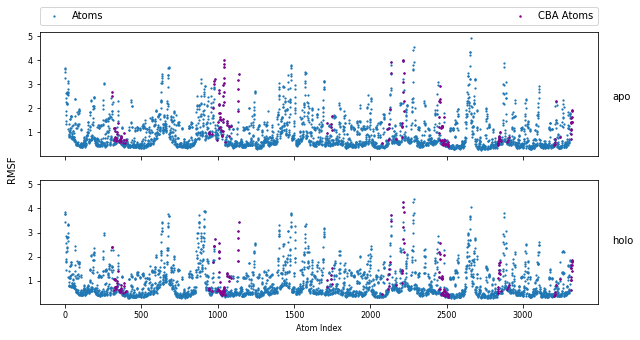

In [96]:
# generating subplots
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex = 'all', sharey = 'all', figsize = (10,5))
cba_atoms = [306, 311, 323, 324, 325, 328, 329, 330, 334, 336, 339, 342, 343, 350, 354, 359, 361, 362, 363, 364, 365, 366, 367, 379,
             385, 386, 395, 398, 941, 944, 946, 963, 972, 978, 979, 980, 997, 1003, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1016,
             1017, 1018, 1022, 1024, 1027, 1029, 1031, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
             1049, 1060, 1061, 1062, 1072, 1074, 1076, 1087, 1133, 1134, 1135, 1136, 1137, 1715, 1716, 1743, 1745, 1747, 1749, 2076,
             2112, 2116, 2120, 2122, 2123, 2126, 2135, 2138, 2170, 2207, 2209, 2210, 2211, 2213, 2214, 2215, 2217, 2219, 2220, 2221,
             2449, 2451, 2452, 2453, 2454, 2455, 2456, 2460, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2477,
             2478, 2480, 2481, 2486, 2487, 2488, 2492, 2494, 2506, 2507, 2508, 2510, 2834, 2835, 2836, 2837, 2838, 2839, 2841, 2842,
             2844, 2845, 2846, 2847, 2851, 2854, 2897, 2899, 2911, 3206, 3207, 3208, 3210, 3219, 3244, 3312, 3313, 3314, 3315, 3316,
             3317, 3318, 3319, 3320, 3321, 3322, 3323]


#colors = ['salmon','orange']
for rmsf, y, traj in zip(md_rmsfs, range(2), mds):
            
    #for atm in cba_atoms:
    #    ax[y].axvline(atm, c = 'darkmagenta', lw = 0.2)
    
    xvals = range(len(rmsf))
    ax[y].scatter(xvals,rmsf, s = 1.5, label = 'Atoms')
    
    cba_rmsf = []
    for atm in cba_atoms:
        for count, item in enumerate(rmsf):
            if count == atm:
                cba_rmsf.append(item)
                
    ax[y].scatter(cba_atoms, cba_rmsf, s = 2, c = 'darkmagenta', label = 'CBA Atoms')
               
    ax[y].tick_params(labelsize=8)
    #ax[y].set_ylabel(traj)
    
ax[1].set_xlabel('Atom Index', fontsize = 8, fontname = 'Arial')
fig.text(0.92, 0.7, 'apo', va = 'center')
fig.text(0.92, 0.3, 'holo', va = 'center')
fig.text(0.08, 0.5, 'RMSF', va = 'center', rotation='vertical')


plt.legend(bbox_to_anchor=(0., 2.3, 1., .102), loc='upper left', ncol=2, mode="expand", borderaxespad=0.)
#plt.legend()

plt.savefig('/home/jegan/centroid_analysis/RMSF/mds_rmsfs_1.png', bbox_inches = 'tight')

Text(0.5, 0, 'Atom Index')

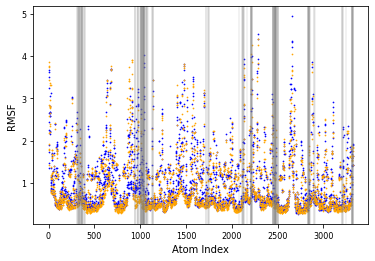

In [100]:

fix, ax = plt.subplots(1,1)

for atm in cba_atoms:
    ax.axvline(atm, c = 'grey', linewidth = 0.2, )

colors = ['blue','orange']
for rmsf, traj, color in zip(md_rmsfs,  mds, colors):
    
    xvals = range(len(rmsf))
    ax.scatter(xvals, rmsf, s = 0.5, c = color)
    
ax.tick_params(labelsize=8)
ax.set_ylabel('RMSF')
ax.set_xlabel('Atom Index')
    

In [ ]:
# instead of calculating RMSF in MDTraj by atom index, we eventually decided to analyze by residue, which we've done in AMBER's cpptraj instead, which is the python script rmsf_residues.py which produces bash script rmsf_residues.sh

In [109]:


#getting the rmsf of residues from cpptraj files

mds = ['apo','holo']
md_rmsfs_res = []

for traj in mds:
    rmsfs = []
    with open(home+traj+'.dat','r') as datafile:
        datafile = datafile.readlines()
        
        for line in datafile[1:]:
            data = line.split()
            rmsfs.append(float(data[1]))
            
    print(rmsfs[0])
    md_rmsfs_res.append(rmsfs)
            
print(len(md_rmsfs_res))
print(len(rmsfs))

2.4244
2.5678
2
220


In [122]:
#getting the residues indices of the cba atoms

xtal = md.load('/home/jegan/final_centroids/XTAL/XTAL_0.pdb')
cba = xtal.atom_slice(cba_atoms)

residues = [atom.residue for atom in cba.top.atoms]
res = list(set(residues)) 
res_str = [str(item) for item in res]
res_ind = [int(item[3:]) for item in res_str]
res_ind = sorted(res_ind)

print(res_ind)

[19, 20, 21, 22, 23, 24, 26, 27, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 77, 114, 116, 138, 141, 142, 144, 147, 162, 163, 164, 165, 166, 187, 191, 212, 214, 218, 219]


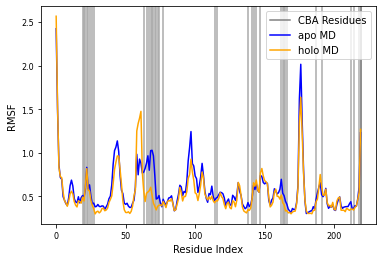

In [141]:
fix, ax = plt.subplots(1,1, figsize = (6, 4))

#for atm in cba_atoms:
#    ax.axvline(atm, c = 'grey', linewidth = 0.2, )

for res in res_ind:
    ax.axvline(res, c = 'darkgrey')
ax.axvline(res, c = 'grey', label = 'CBA Residues')
colors = ['blue','orange']
for rmsf, traj, color in zip(md_rmsfs_res,  mds, colors):
    
    xvals = range(len(rmsf))
    ax.plot(xvals, rmsf, c = color, label = (traj+' MD'))

plt.legend(loc = 'upper right')
ax.tick_params(labelsize=8)
ax.set_ylabel('RMSF')
ax.set_xlabel('Residue Index')

plt.savefig('/home/jegan/centroid_analysis/RMSF/mds_rmsfs_2.png', bbox_inches = 'tight', dpi = 300)